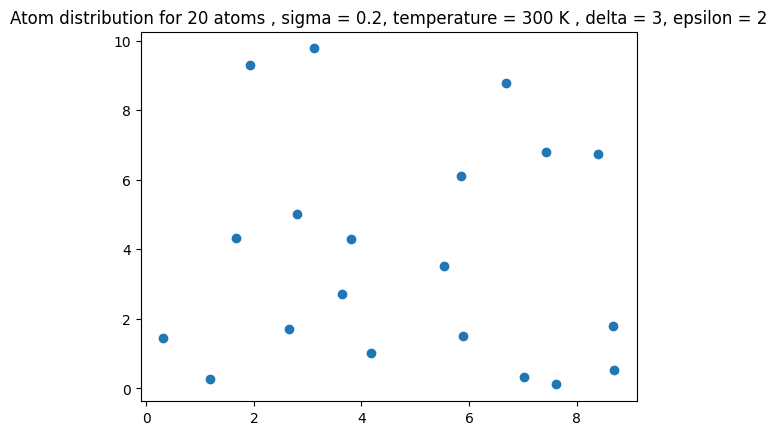

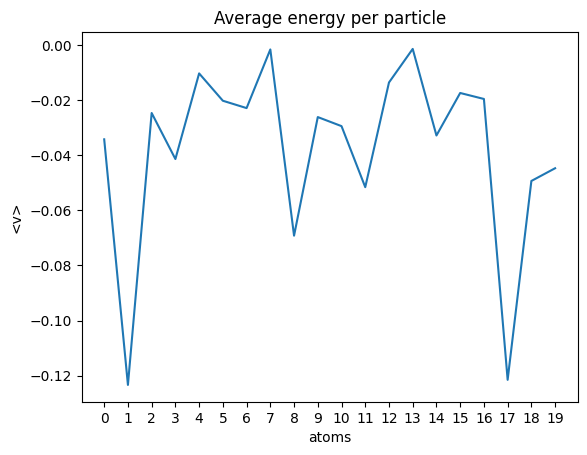

In [8]:
import time
from datetime import datetime
import numpy as np
import sympy as sym
import math
import array
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as sx
import matplotlib.mlab as mlab
from sklearn.neighbors import KernelDensity as kd
import matplotlib.ticker as mticker
from numpy import linspace
import random
from cmath import sqrt
atoms = 20
rounds = 1
steps = 100
v_total =[[(i,n)for n in range(atoms)]for i in range(steps)]
b = steps-1
ergo = [[(p,i) for i in range(b)]for p in range(rounds)]
v_sqr_avgst = [[(p,i) for i in range(steps)]for p in range(rounds)]
v_avg_sqrst = [[(p,i) for i in range(steps)]for p in range(rounds)]
v_avgstore = [[(p,i) for i in range(steps)]for p in range(rounds)]

delta_store = []
acceptance = []

sigma = 0.2
g_store = []
x_store= [(0) for i in range (atoms)]
y_store= [(0) for i in range(atoms)]
v_total1 = [[(g,i)for i in range(atoms)]for g in range(steps)]
min_value = 0.
max_value = 10.
delta =3
sig = 10/atoms
copies = 2
a = 2
kb = 1.98e-3 #this is a test. For ease of calculation values were changed
distance_store = []
dis_store = []
epsilon = 2

def rand_generator(a,b):#generates a random number within the limits a and b
    val = random.uniform(a,b)
    return val

def potential(x):#generates LJ potential values based on distance x
     v = 4*epsilon*((sigma/x)**12-(sigma/x)**6)


     return(v)

def cut_off(x_new,y_new): #applies Periodic Boundary Conditions, atom that leaves the box from the right end of the box
                          #enters the box from the left end.
    if x_new > max_value:
       x_new -= max_value

    if y_new > max_value:
       y_new -= max_value
    if x_new <= min_value:
         x_new += max_value
    if y_new <= min_value:
         y_new += max_value

    return(x_new,y_new)


def boltzmann(dE,T): #calculates boltzmann energy values for the energy of a move.
  a = (-1*dE)/(kb*T)
  exp_val = np.exp(a)
  return exp_val

def select(x_ini,y_ini,x_later,y_later,v_ini,v_later,T):#accepts or rejects a move based on energy or
                                                        #boltzmann value calculated to the corresponding energy

  if v_later < v_ini:
    v_ini = v_later
    x_ini = x_later
    y_ini =y_later

  else:
    dE = v_later-v_ini
    r = rand_generator(0,1)
    bolt = boltzmann(dE,T)
    if (r <= bolt):
      v_ini = v_later
      x_ini = x_later
      y_ini = y_later


  return x_ini,y_ini,v_ini

def move(x_ini,y_ini,delta): # makes a move by multiplying delta(size of move) by a random number between -1 and 1
    x_new = x_ini + rand_generator(-1,1)*delta
    y_new = y_ini + rand_generator(-1,1)*delta
    xi,yi= cut_off(x_new,y_new)

    return xi,yi

def mc(temp,start,increments,z):
    v_sqr = 0
    v_sqr_t = 0
    v_tot = 0
    v_avg = 0
    v_avg_sqr = 0
    t = atoms

    for n in range(start,increments):


          index= int(random.uniform(0,t))# choses an atom to move randomly.



          x_ini = rx_store[index][n] # writes initial coordinates the variable x_ini and y_ini
          y_ini = ry_store[index][n]
          x_ii,y_ii = move(x_ini,y_ini,delta)# moves the atom based on size of move and initial coordinates of the atom
          gap1_store = []
          v_tot = 0

          for l in range(atoms):#selects all the atoms except for the randomly chosen atom to moove and writes
                                #it's coordinates to x_nei and y_nei
              if l != index :


                x_nei = rx_store[l][n]
                y_nei = ry_store[l][n]



                x_gap = abs(x_ii-x_nei)#calculates the x and y coordinate distances between the seleced neighbor atom and itself
                y_gap = abs(y_ii-y_nei)

                if x_gap > max_value/2 :#applies minimum image convention, if the gap between neighbor and the selected atom
                                        #is greater than the cut-off(half of the box length) , the gap is subtracted by the
                                        #box length to apply minimum image convention
                      x_gap = 10 - x_gap
                if y_gap > max_value/2:
                        y_gap = 10 -y_gap

                gap = math.sqrt(x_gap**2 + y_gap**2)
                v = potential(gap) #LJ potential is calculated based on the box distance between the neighbor and the
                                   #selected atom too move.
                v_tot = v_tot + v
                gap1_store.append(gap)#stores distances between atoms in a list

                o = (len(gap1_store))
          count = 0
          for b in range(o):          #compares the distances and sig(gap that should be maintained between atoms)
              if gap1_store[b] < sig:
                break
              else:
                count = count  +1    #keeps the count of the number of instances accepted




          if count == o:            #proceeds only if all atoms maintain atleast a distance of sig
                v_ini = v_total[n][index]

                x_ini,y_ini,v_ini= select(x_ini,y_ini,x_ii,y_ii,v_ini,v_tot,temp)#returns the selected x coordinates and y coordinates of the moved atom
                for l in range(n,increments): #writes the selected coordinates and potential in the list from the current step onwards
                    v_total[n][index] = v_ini


                for l in range(n,increments):
                    rx_store[index][l] = x_ini
                    ry_store[index][l] = y_ini


                for c in range(atoms):#after each step calculate (after each move)calculates potential of each particle and
                                      #stores in the list v_total1



                            v_tot =0
                            x_ini = rx_store[c][n]
                            y_ini = ry_store[c][n]

                            for u in range(atoms):
                                if u != c :


                                  x_nei = rx_store[u][n]
                                  y_nei = ry_store[u][n]
                                  x_gap = abs(x_ini-x_nei)
                                  y_gap = abs(y_ini-y_nei)
                                  if x_gap > max_value/2 :
                                        x_gap = 10 - x_gap
                                  if y_gap > max_value/2:
                                          y_gap = 10 -y_gap

                                  gap = math.sqrt(x_gap**2 + y_gap**2)
                                  v = potential(gap)
                                  v_tot = v_tot + v
                            h = n-1
                            v_ini = v_total1[h][c]
                            g = v_tot+v_ini
                            v_total1[n][c] =g

h = rounds

for z in range(rounds):
      acc = 0
      y = 10
      r = steps
      copies = 2
      rx_store = [[(i,n)for n in range(r)]for i in range(atoms)]
      ry_store = [[(i,n)for n in range(r)]for i in range(atoms)]
      vx_store = []
      vy_store = []
      dis_store = []

      count = 0
      p = 0



      while (p < atoms):#generates 50 atoms in the box with a minimum distance of sig between each of them and writes generated
                        #coordinates and potentials to lists
          #print("p",p)
          x_ini = rand_generator(0,10)
          y_ini = rand_generator(0,10)
          v_tot = 0
          dis_store = []

          if p == 0:

            for l in range(r):
                    rx_store[p][l] = x_ini
                    ry_store[p][l] = y_ini

            t = math.sqrt((x_ini)**2 + (y_ini)**2)
            v_ini = potential(t)
            for i in range(steps):

                  v_total[i][p] = v_ini
            p = p+1
          else:
              for s in range(p):

                  dis_store.append(math.sqrt((x_ini-rx_store[s][0])**2 + (y_ini-ry_store[s][0])**2))

              count = 0
              for i in range(p):

                if dis_store[i] < sig:
                   break

                else :
                  count = count  +1
              if count == p:
                for i in range(p):
                  s = dis_store[i]
                  v = potential(s)

                  v_tot = v_tot + v


                for l in range(r):

                        rx_store[p][l] = x_ini
                        ry_store[p][l] = y_ini
                for i in range(steps):
                    v_total[i][p] = v_tot

                p = p +1


      xx_store = []
      yy_store = []
      for i in range(atoms):
            gx = rx_store[i][0]
            #print("gx",gx)
            gy = ry_store[i][0]
            xx_store.append(gx)
            yy_store.append(gy)
      plt.scatter(xx_store,yy_store)
      plt.title("Atom distribution for 20 atoms , sigma = 0.2, temperature = 300 K , delta = 3, epsilon = 2")
      plt.pause(1)
      plt.xlabel("x")
      plt.ylabel("y")

      x = 1

      q = 1
      acc = 0
      count1 = 0

      xx_store = []
      yy_store = []

      count = 0

      increments = steps
      q = 2
      temp = 300

      for c in range(atoms):
        x_ini =  rx_store[c][0]
        y_ini =  ry_store[c][0]
        v_tot = 0
        for u in range(atoms):
              if u != c :


                  x_nei = rx_store[u][0]
                  #print("x_nei",x_nei)
                  y_nei = ry_store[u][0]
                  #print("y_nei",y_nei)
                  x_gap = abs(x_ini-x_nei)
                  y_gap = abs(y_ini-y_nei)
                  if x_gap > max_value/2 :
                        x_gap = 10 - x_gap
                  if y_gap > max_value/2:
                          y_gap = 10 -y_gap

                  gap = math.sqrt(x_gap**2 + y_gap**2)

                  v = potential(gap)
                  v_tot = v_tot +v
        for i in range(steps):
            v_total1[i][c]= v_tot

      mc(300,x,steps,z)
v_d = 0
v_average= []
for i in range(atoms):
  v_d = 0
  for p in range(steps):

      v = v_total1[p][i]
      v_d = v_d +v
  v_avg = v_d/steps
  v_average.append(v_avg)


steps_store=[]
i = 0
while i<atoms:
    steps_store.append(i)
    i = i+1
plt.plot(steps_store,v_average)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title("Average energy per particle")
plt.ylabel("<v>")
plt.xlabel("atoms")
plt.show()
